# Example 4
In this example, we detect core-periphery structure in the airport networks 

# Packages

In [1]:
%load_ext autoreload
%autoreload 2
import sys

import cpnet
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

# import utils
from scipy import sparse

# Data

The worldwide airport network constructed from the openflight data.

Data source: 
- http://opsahl.co.uk/tnet/datasets/openflights.txt
- http://opsahl.co.uk/tnet/datasets/openflights_airports.txt
- https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv

Code to generate this network
- https://github.com/skojaku/core-periphery-detection/blob/add-notebook/scripts/generate-airport-net.py

In [2]:
# Node attributes
node_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/core-periphery-detection/master/data/node-table-airport.csv"
)

# Edge table
edge_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/core-periphery-detection/master/data/edge-table-airport.csv"
)

In [3]:
G = nx.from_pandas_edgelist(edge_table)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2905
Number of edges: 15645
Average degree:  10.7711


# Detect core-periphery structure

In [4]:
# Detect core-periphery structure
kmconfig = cpnet.KM_config()  # Call the BE algorithm
kmconfig.detect(G)  # Detect core-periphery structures
c = kmconfig.get_pair_id()  # Get the group membership of nodes
x = kmconfig.get_coreness()  # Get the coreness of nodes

# Statistical test

In [6]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.05, num_of_rand_net=100, num_of_thread=1
)

100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


# Visualization

In [7]:
pos = nx.spring_layout(
    G, scale = 2
)  # The position can be calculated and passed to the drawing function

100%|██████████| 500/500 [00:24<00:00, 20.09it/s]


BarnesHut Approximation  took  12.00  seconds
Repulsion forces  took  11.60  seconds
Gravitational forces  took  0.07  seconds
Attraction forces  took  0.13  seconds
AdjustSpeedAndApplyForces step  took  0.36  seconds


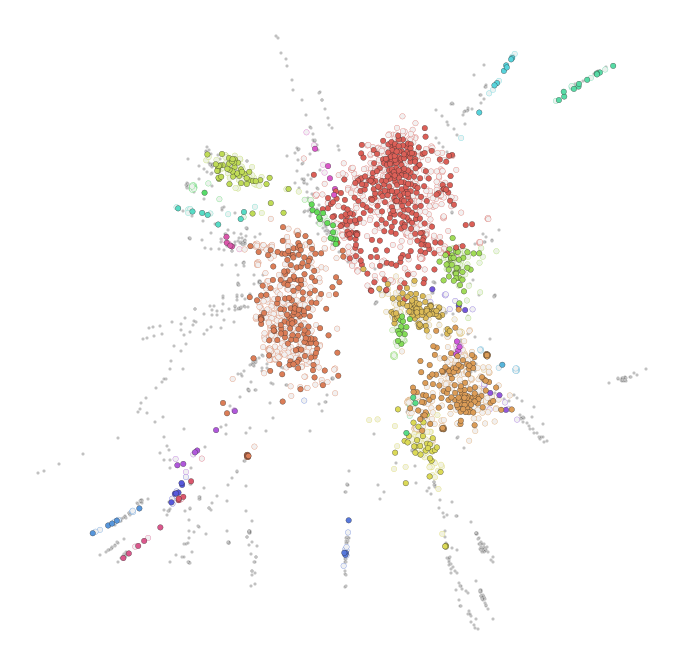

In [9]:
fig = plt.figure(figsize=(12, 12))
ax = plt.gca()

draw_nodes_kwd = {"node_size": 30, "linewidths": 0.3}
ax, pos = cpnet.draw(
    G,
    sig_c,
    sig_x,
    ax,
    draw_nodes_kwd=draw_nodes_kwd,
    draw_edge=False,
    layout_kwd = {"verbose":True, "iterations":500}
)